# <h1><center>Simple Recommender systems</center></h1>



### Content based RS

#### Import the [movies](https://drive.google.com/file/d/1ubB-lZJcRNo5BmZUMDLQgwJTPP2LlkYf/view?pli=1)  and  [ratings](https://drive.google.com/file/d/1AD_plcvNdhSlnpL1vzOSUFvoC4NzBwK1/view) datasets (which are part of a small version of the MovieLens dataset). 

In [1]:
import numpy as np
import pandas as pd


movies_path = "./movies.csv"
ratings_path = "./ratings.csv"

movies = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path)

print(movies.shape)
print(ratings.shape)
print(movies.head())
print(ratings.head())


(9742, 3)
(100836, 4)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


#### Data preprocessing : compute the 1-hot columns corresponding to the movies 'genres'.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

movies['genres'] = movies['genres'].str.replace('-', '_') # because some genres contain '-'
movies['genres'] = movies['genres'].str.replace('(no genres listed)', 'no_listed')

# 1 hot columns computation:
count = CountVectorizer()
count_matrix = count.fit_transform(movies['genres'])

# conversion to dataframe and row/column names adjustment:
count_matrix_df = pd.DataFrame(count_matrix.toarray()) 
count_matrix_df.index = movies['movieId']
count_matrix_df.columns = count.get_feature_names()

type(count_matrix)

print(count_matrix_df.columns)

print(count_matrix_df)



Index(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'imax',
       'musical', 'mystery', 'no_listed', 'romance', 'sci_fi', 'thriller',
       'war', 'western'],
      dtype='object')
         action  adventure  animation  children  comedy  crime  documentary  \
movieId                                                                       
1             0          1          1         1       1      0            0   
2             0          1          0         1       0      0            0   
3             0          0          0         0       1      0            0   
4             0          0          0         0       1      0            0   
5             0          0          0         0       1      0            0   
...         ...        ...        ...       ...     ...    ...          ...   
193581        1          0          1         0       1      0            0   
193583        0    

C:\Users\ecreu\AppData\Local\Temp\ipykernel_17784\3996324389.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['genres'] = movies['genres'].str.replace('(no genres listed)', 'no_listed')
C:\Users\ecreu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### User profile computation.

###### Filter the ratings and the movies data to the user '20' and sort the ratings, merge the 2 datasets and sort the resulting dataset in decreasing rating order.

In [3]:
ratings_1_user = ratings.loc[ratings['userId'] == 20, :]
movies_1_user = ratings_1_user['movieId']
count_matrix_df_1_user = count_matrix_df.loc[movies_1_user]
ratings_1_user['rating'].index = count_matrix_df_1_user.index

print(ratings_1_user.shape)
print(ratings_1_user.head())

df_1_user = pd.merge(left=movies, right=ratings_1_user, how='inner')[['movieId', 'title', 'genres', 'rating']]
df_1_user.sort_values(by='rating', ascending=False)

(242, 4)
      userId  movieId  rating   timestamp
2977      20        2     3.0  1054038313
2978      20        8     1.0  1054038422
2979      20       13     4.0  1054038425
2980      20       34     4.0  1054038093
2981      20       48     5.0  1054038357


,movieId,title,genres,rating
87,2300,"Producers, The (1968)",Comedy,5.0
36,1025,"Sword in the Stone, The (1963)",Animation|Children|Fantasy|Musical,5.0
231,5991,Chicago (2002),Comedy|Crime|Drama|Musical,5.0
43,1073,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,5.0
45,1097,E.T. the Extra-Terrestrial (1982),Children|Drama|Sci_Fi,5.0
...,...,...,...,...
221,5504,Spy Kids 2: The Island of Lost Dreams (2002),Adventure|Children,0.5
189,4821,Joy Ride (2001),Adventure|Thriller,0.5
216,5419,Scooby-Doo (2002),Adventure|Children|Comedy|Fantasy|Mystery,0.5
171,4367,Lara Croft: Tomb Raider (2001),Action|Adventure,0.5


###### Compute the user's weighting genre profile.

In [4]:
ratings_1_user.index = count_matrix_df_1_user.index
profile_1_user = count_matrix_df_1_user.T.dot(ratings_1_user['rating'])
profile_1_user = profile_1_user / sum(profile_1_user)

print(profile_1_user.sort_values(ascending=False))
print(profile_1_user.sum())

children       0.156707
comedy         0.139195
adventure      0.106878
animation      0.098213
drama          0.097671
musical        0.088825
fantasy        0.066980
romance        0.057592
action         0.046759
thriller       0.036469
crime          0.029247
sci_fi         0.025636
mystery        0.018595
horror         0.013540
imax           0.008305
war            0.005055
documentary    0.002708
western        0.001083
film_noir      0.000542
no_listed      0.000000
dtype: float64
1.0


###### Compute rating predictions and evaluate the profile predictive models on the same data.

In [5]:
import math
predictions_profile = count_matrix_df_1_user.dot(profile_1_user) # prediction
predictions_profile = predictions_profile * 4.5 + 0.5 # normalisation

# Evaluation:
real_grades = ratings_1_user['rating']
rmse_profile = math.sqrt(sum((predictions_profile - real_grades)**2) / count_matrix_df_1_user.shape[0])
print(rmse_profile)

2.1118285078945394


###### Train a regression tree in order to learn the user 20's profile from the filtered data

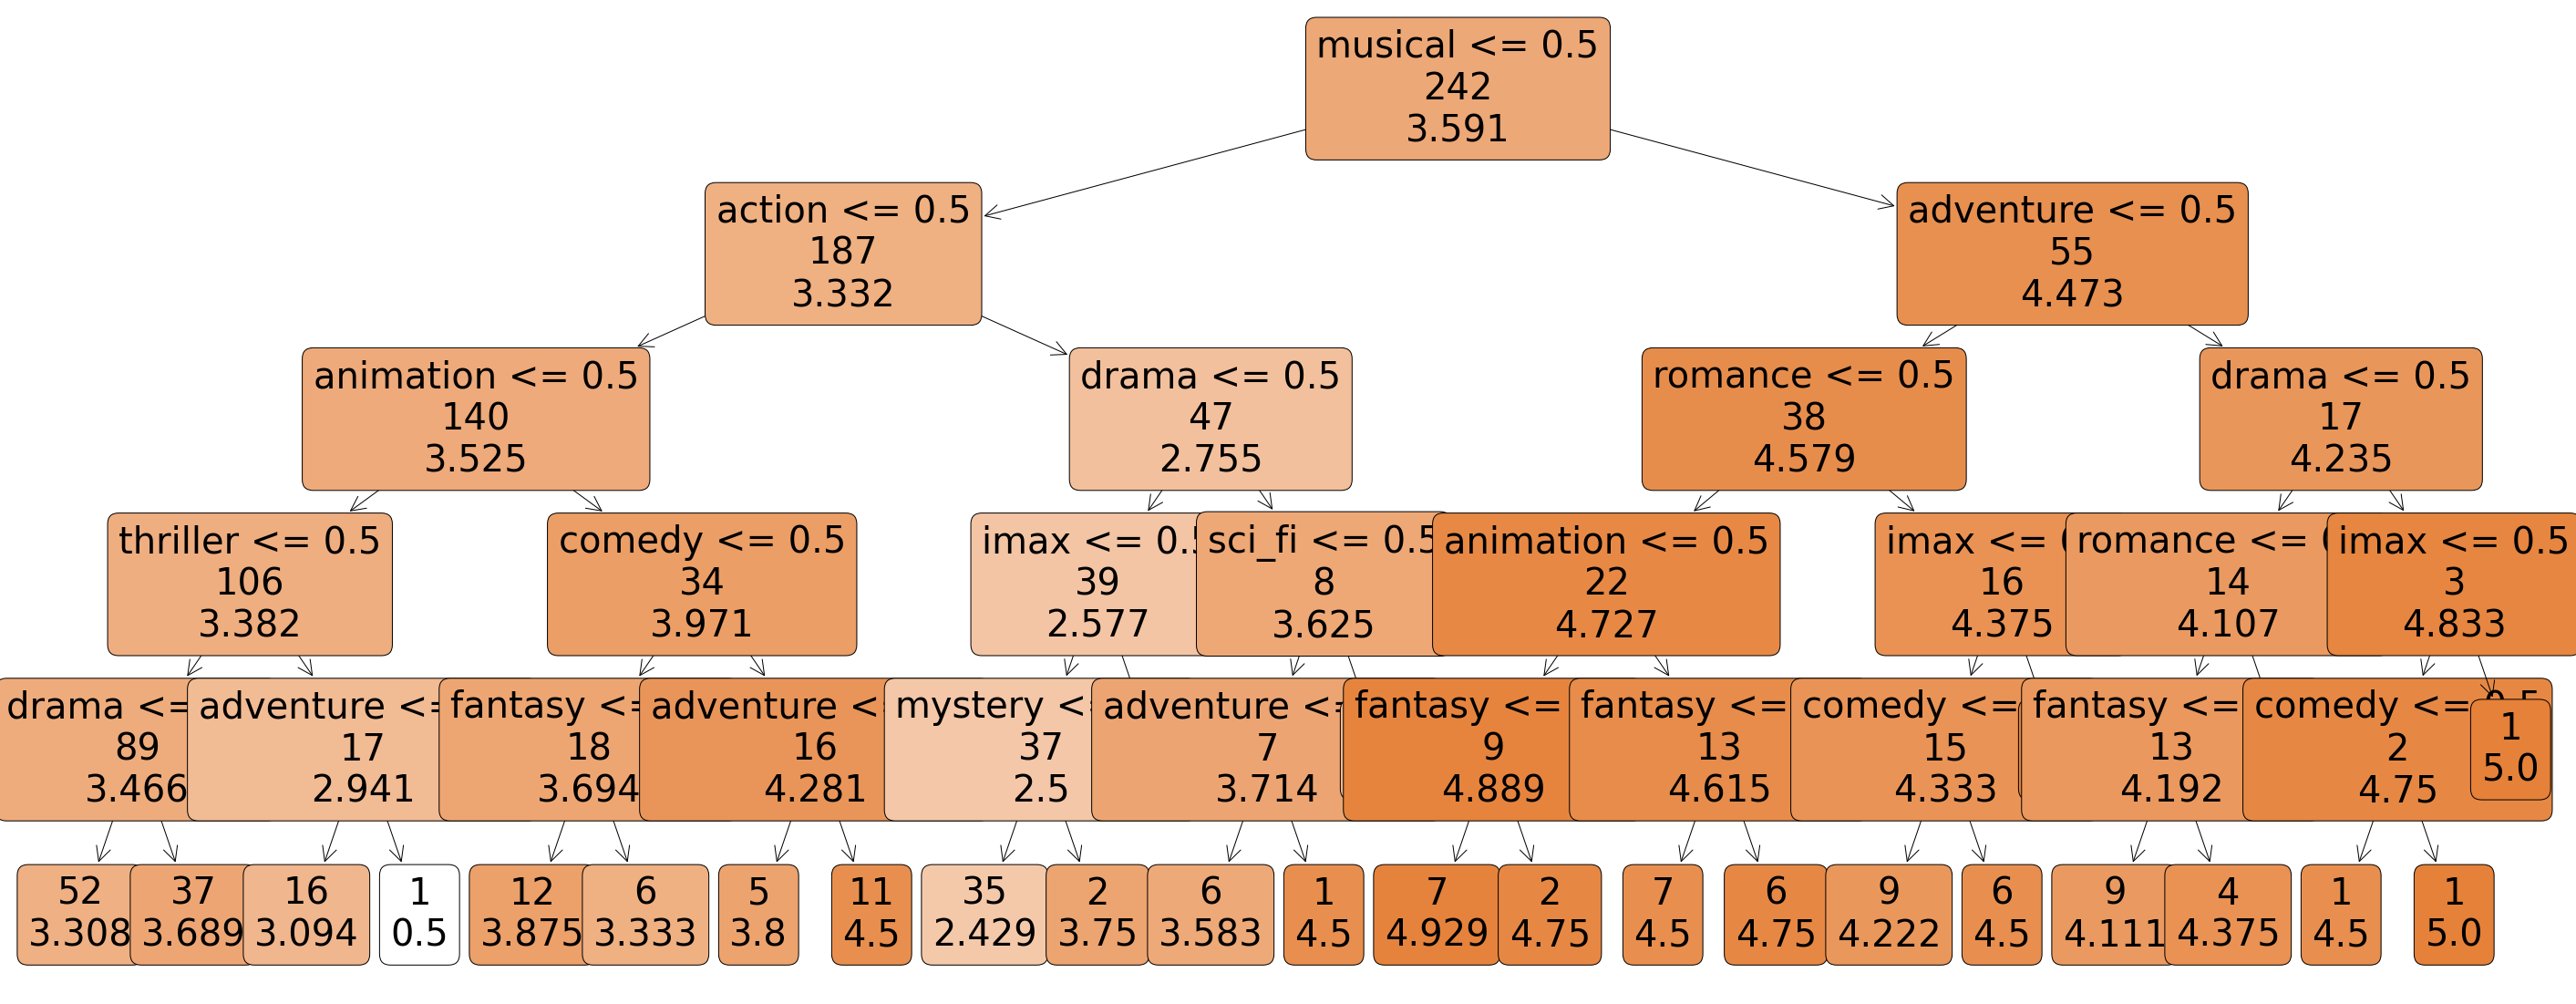

In [6]:
from sklearn import tree

my_tree = tree.DecisionTreeRegressor(max_depth=5)
my_tree.fit(count_matrix_df_1_user, ratings_1_user['rating'])

import matplotlib.pyplot as plt
plt.figure(figsize=(50,20))
tree.plot_tree(my_tree, feature_names=count_matrix_df_1_user.columns, max_depth=6, 
               filled=True, rounded=True, fontsize=40, label='none', impurity=False) 
plt.show()

###### Evaluate the tree on the same data.

In [7]:
predictions_tree = my_tree.predict(count_matrix_df_1_user)
real_grades = ratings_1_user['rating']
rmse_tree = math.sqrt(sum((predictions_tree - real_grades)**2) / count_matrix_df_1_user.shape[0])
print(rmse_tree)

0.9086562577962756


#### Recommendations computation

In [8]:
# Predictions:
l = list(set(count_matrix_df.index) - set(ratings_1_user['rating'].index)) # indexes of unrated items
count_matrix_df_unrated = count_matrix_df.loc[l]
predictions_new_grades = pd.Series(my_tree.predict(count_matrix_df_unrated))
predictions_new_grades.index = count_matrix_df_unrated.index
print(predictions_new_grades.head)

# Sorting of the predicted ratings in order to extract recommendations:
v = predictions_new_grades.value_counts()
print(v.sort_index(ascending=False))
print(count_matrix_df_1_user.shape)

<bound method NDFrame.head of movieId
1         4.500000
3         3.307692
4         3.689189
5         3.307692
6         2.428571
            ...   
163809    3.875000
32743     3.093750
98279     3.307692
65514     3.583333
98296     3.093750
Length: 9500, dtype: float64>
5.000000       2
4.928571     150
4.750000      16
4.500000     241
4.375000       7
4.222222      26
4.111111      10
4.000000      75
3.875000     124
3.800000     111
3.750000      52
3.689189    2998
3.583333     362
3.333333      59
3.307692    2867
3.093750    1172
3.000000      59
2.428571    1128
0.500000      41
dtype: int64
(242, 20)


###### Return the movie titles of the two first recommendations and check their relevance.

In [9]:
moviesId_best_reco = predictions_new_grades.loc[predictions_new_grades == 5].index # extraction de l'id des meilleurs recommandations
best_reco = movies[movies['movieId'].isin(moviesId_best_reco)]
print(best_reco)

      movieId                   title  \
7467    81847          Tangled (2010)   
8068    99149  Misérables, Les (2012)   

                                                 genres  
7467  Animation|Children|Comedy|Fantasy|Musical|Roma...  
8068                         Drama|Musical|Romance|IMAX  


### Collaborative filtering

#### With the surprise package, compare all available KNN approaches through 5-fold cross validation procedures.

basic KNN: OK
KNN with means: OK
KNN Z-score: OK
KNN baseline: OK


mean RMSE results:
KNN             0.947
KNN_means       0.894
KNN_Z           0.896
KNN_baseline    0.873
dtype: float64


mean computation times:
                CT
KNN           1.02
KNN_means     0.86
KNN_Z         1.00
KNN_baseline  1.13


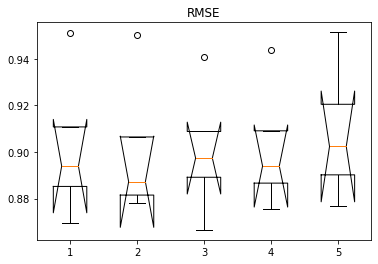

In [10]:
!pip install scikit-surprise

from surprise import prediction_algorithms
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import time

n_folds = 5

# A reader is still needed but only the rating_scale param is required.
reader = Reader()

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
print('basic KNN:', end=' ')
start = time.time()
res_KNNBasic = cross_validate(prediction_algorithms.KNNBasic(), data, cv=n_folds, n_jobs=-1)
end = time.time()

CT_KNNBasic = (end - start)/n_folds
print('OK\nKNN with means:', end=' ')
start = time.time()
res_KNNWithMeans = cross_validate(prediction_algorithms.KNNWithMeans(), data, cv=n_folds, n_jobs=-1)
end = time.time()

CT_KNNWithMeans = (end - start)/n_folds
print('OK\nKNN Z-score:', end=' ')
start = time.time()
res_KNNWithZScore = cross_validate(prediction_algorithms.KNNWithZScore(), data, cv=n_folds, n_jobs=-1)
end = time.time()

CT_KNNWithZScore = (end - start)/n_folds
print('OK\nKNN baseline:', end=' ')
start = time.time()
res_KNNBaseline = cross_validate(prediction_algorithms.KNNBaseline(), data, cv=n_folds, n_jobs=-1)
end = time.time()

CT_KNNBaseline = (end - start)/n_folds
print('OK')

res_rmse_KNN_df = pd.DataFrame([res_KNNBasic['test_rmse'], res_KNNWithMeans['test_rmse'], 
                                res_KNNWithZScore['test_rmse'], res_KNNBaseline['test_rmse']])
res_rmse_KNN_df = res_rmse_KNN_df.T

models = ['KNN', 'KNN_means', 'KNN_Z', 'KNN_baseline']
res_rmse_KNN_df.columns = models


res_ct_KNN_df = pd.DataFrame({'CT':[CT_KNNBasic, CT_KNNWithMeans, 
                                    CT_KNNWithZScore, CT_KNNBaseline]})
res_ct_KNN_df.index = models

print("\n\nmean RMSE results:")
print(round(res_rmse_KNN_df.mean(), 3))
print("\n\nmean computation times:")
print(round(res_ct_KNN_df, 2))

fig, axs = plt.subplots()
axs.boxplot(res_rmse_KNN_df.T, notch=True)
axs.set_title('RMSE')
plt.show()

#### Same thing for all available SVD approaches.

In [11]:
n_folds = 3

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader()

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
print('\nSVD:', end=' ')
start = time.time()
res_SVD = cross_validate(prediction_algorithms.matrix_factorization.SVD(), data, cv=n_folds, n_jobs=-1)
end = time.time()
CT_SVD = (end - start)/n_folds
print('OK\nSVD pp:', end=' ')
start = time.time()
res_SVDpp = cross_validate(prediction_algorithms.matrix_factorization.SVDpp(), data, cv=n_folds, n_jobs=-1)
end = time.time()
CT_SVDpp = (end - start)/n_folds
print('OK')

res_rmse_SVD_df = pd.DataFrame([res_SVD['test_rmse'], res_SVDpp['test_rmse']])
res_rmse_SVD_df = res_rmse_SVD_df.T
models = ['SVD', 'SVDpp']
res_rmse_SVD_df.columns = models

res_ct_SVD_df = pd.DataFrame({'CT':[CT_SVD, CT_SVDpp]})
res_ct_SVD_df.index = models

print("\nmean results:")
print(round(res_rmse_SVD_df.mean(), 3))
print("\n\nmean computation times:")
print(round(res_ct_SVD_df, 2))

res_rmse_SVD_df = pd.DataFrame([res_SVD['test_rmse'], res_SVDpp['test_rmse']])
res_rmse_SVD_df = res_rmse_SVD_df.T
models = ['SVD', 'SVDpp']
res_rmse_SVD_df.columns = models

res_ct_SVD_df = pd.DataFrame({'CT':[CT_SVD, CT_SVDpp]})
res_ct_SVD_df.index = models

print("\nmean results:")
print(round(res_rmse_SVD_df.mean(), 3))
print("\n\nmean computation times:")
print(round(res_ct_SVD_df, 2))


SVD: OK
SVD pp: OK

mean results:
SVD      0.880
SVDpp    0.868
dtype: float64


mean computation times:
          CT
SVD     0.89
SVDpp  28.64

mean results:
SVD      0.880
SVDpp    0.868
dtype: float64


mean computation times:
          CT
SVD     0.89
SVDpp  28.64


#### 0.8/0.2 cross validation repeated 10 times comparing the best KNN approach (according to the question (a)) with the standard SVD one, and results.

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8665
RMSE: 0.8658
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8725
RMSE: 0.8735
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8671
RMSE: 0.8698
RMSE for 3 runs:
KNN baseline    0.8687
SVD             0.8697
dtype: float64


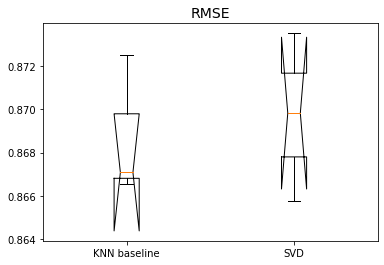

In [12]:
from sklearn.utils import shuffle
from surprise import accuracy
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt

reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
models = ['KNN baseline', 'SVD']
n_runs = 3
rmse_knn = []
rmse_svd = []
for i in list(range(n_runs)):

    trainset, testset = train_test_split(data, test_size=0.2)
    
    knn = prediction_algorithms.KNNBaseline()
    svd = prediction_algorithms.matrix_factorization.SVD()
    
    knn.fit(trainset)
    svd.fit(trainset)
    
    knn_predictions = knn.test(testset)
    svd_predictions = svd.test(testset)
    
    rmse_knn.append(accuracy.rmse(knn_predictions))
    rmse_svd.append(accuracy.rmse(svd_predictions))

RMSE = pd.concat([pd.Series(rmse_knn), pd.Series(rmse_svd)], axis=1)
RMSE.columns = models

print('RMSE for ' + str(n_runs) + ' runs:')
print(round(RMSE.mean(), 4))
fig, axs = plt.subplots()
axs.boxplot(RMSE, notch=True, labels=models)
axs.set_title('RMSE', fontsize=14)
plt.show()

### Test personnal recommendations

#### Add some personnal ratings

In [19]:
df = ratings[['userId', 'movieId', 'rating']]
df_personnal = pd.DataFrame({'userId': [611]*23,
                   'movieId': [1,48,191,199,260,356,357,362,193583,189713,336,500,527,597,1028,1032,1073,1136,176601,175485,168492,164909,163134],
                   'rating': [4.0,4.0,3.5,3.5,4.0,4.5,4.0,3.5,4.5,4.0,3.0,4.0,4.5,2.5,4.0,4.0,4.0,3.0,4.5,4.5,4.5,4.0,3.0]})
df = df.append(df_personnal, ignore_index = True)

print(df.tail(10))


        userId  movieId  rating
100849     611      597     2.5
100850     611     1028     4.0
100851     611     1032     4.0
100852     611     1073     4.0
100853     611     1136     3.0
100854     611   176601     4.5
100855     611   175485     4.5
100856     611   168492     4.5
100857     611   164909     4.0
100858     611   163134     3.0


C:\Users\ecreu\AppData\Local\Temp\ipykernel_17784\375319222.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_personnal, ignore_index = True)


#### Evaluate KNN-baseline and SVD collaborative filtering

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8676
RMSE: 0.8685
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8807
RMSE: 0.8752
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8769
RMSE: 0.8801
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8770
RMSE: 0.8777
RMSE for 4 runs:
KNN Baseline    0.8756
SVD             0.8754
dtype: float64


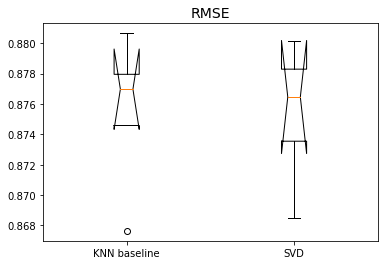

In [20]:
reader = Reader()
data = Dataset.load_from_df(df, reader)
k_runs = 4
rmse_knn = []
rmse_svd = []

for i in list(range(k_runs)):
    trainset, testset = train_test_split(data, test_size=0.2)
    
    knn = prediction_algorithms.KNNBaseline()
    svd = prediction_algorithms.matrix_factorization.SVD()
    
    knn.fit(trainset)
    svd.fit(trainset)
    
    knn_predictions = knn.test(testset)
    svd_predictions = svd.test(testset)
    
    rmse_knn.append(accuracy.rmse(knn_predictions))
    rmse_svd.append(accuracy.rmse(svd_predictions))

RMSE = pd.concat([pd.Series(rmse_knn), pd.Series(rmse_svd)], axis=1)

knn_predictions = knn.test(testset)
svd_predictions = svd.test(testset)

knn_pred = pd.DataFrame(knn_predictions, columns=[ 'userId', 'movieId', 'base_event', 'predict_event', 'details'])
svd_pred = pd.DataFrame(svd_predictions, columns=[ 'userId', 'movieId', 'base_event', 'predict_event', 'details'])

RMSE.columns = ['KNN Baseline', 'SVD']

print('RMSE for ' + str(k_runs) + ' runs:')
print(round(RMSE.mean(), 4))
fig, axs = plt.subplots()
axs.boxplot(RMSE, notch=True, labels=models)
axs.set_title('RMSE', fontsize=14)
plt.show()


#### Compute the 15 best recommendations

In [21]:
ratings_611_knn = []
ratings_611_svd = []
for m in movies['movieId'] :
    
    knn_result = knn.predict("611", m)
    ratings_611_knn.append([m,knn_result.est])
    
    svd_result = svd.predict("611", m)
    ratings_611_svd.append([m,svd_result.est])
    

ratings_611_knn_df = pd.DataFrame(ratings_611_knn, columns=['movieId','est'])
ratings_611_svd_df = pd.DataFrame(ratings_611_svd, columns=['movieId','est'])


top_15_knn = ratings_611_knn_df.nlargest(n=15, columns=['est'])
top_15_svd = ratings_611_svd_df.nlargest(n=15, columns=['est'])


movie_title_knn = []
for id in top_15_knn['movieId'] :
    
    movie_title_knn.append(movies.loc[movies['movieId'] == id, 'title'].iloc[0])

    
movie_title_svd = []
for id in top_15_svd['movieId'] :
    
    movie_title_svd.append(movies.loc[movies['movieId'] == id, 'title'].iloc[0])   

    
top_15_knn.insert(1, 'movieTitle', movie_title_knn)
top_15_svd.insert(1, 'movieTitle', movie_title_svd)


print("\nKNN recommendations :\n")
display(top_15_knn)

print("\nSVD recommendations :\n")
display(top_15_svd)


KNN recommendations :



,movieId,movieTitle,est
277,318,"Shawshank Redemption, The (1994)",4.414428
2226,2959,Fight Club (1999),4.299006
899,1197,"Princess Bride, The (1987)",4.262071
46,50,"Usual Suspects, The (1995)",4.258418
659,858,"Godfather, The (1972)",4.257774
686,904,Rear Window (1954),4.256114
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,4.249223
922,1221,"Godfather: Part II, The (1974)",4.239430
906,1204,Lawrence of Arabia (1962),4.238800
896,1193,One Flew Over the Cuckoo's Nest (1975),4.237252



SVD recommendations :



,movieId,movieTitle,est
277,318,"Shawshank Redemption, The (1994)",4.411344
906,1204,Lawrence of Arabia (1962),4.376572
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,4.292284
596,741,Ghost in the Shell (Kôkaku kidôtai) (1995),4.282199
899,1197,"Princess Bride, The (1987)",4.281711
686,904,Rear Window (1954),4.280787
2226,2959,Fight Club (1999),4.278799
896,1193,One Flew Over the Cuckoo's Nest (1975),4.266726
863,1136,Monty Python and the Holy Grail (1975),4.258030
46,50,"Usual Suspects, The (1995)",4.237683
